# Aplicações do Finbert-PT-BR

In [6]:
from transformers import (AutoTokenizer, BertForSequenceClassification, AutoModelForSequenceClassification, pipeline)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# finbert_pt_br_tokenizer = AutoTokenizer.from_pretrained("lucas-leme/FinBERT-PT-BR")
# finbert_pt_br_model = AutoModelForSequenceClassification.from_pretrained("lucas-leme/FinBERT-PT-BR")

# pipe = pipeline(task='text-classification', model=finbert_pt_br_model, tokenizer=finbert_pt_br_tokenizer)
# pipe(['Hoje a bolsa caiu', 'Hoje a bolsa subiu'])

pipe = pipeline("text-classification", model="lucas-leme/FinBERT-PT-BR")
print(pipe(['Hoje a bolsa caiu', 'Hoje a bolsa subiu']))

Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.7304732799530029}, {'label': 'POSITIVE', 'score': 0.5405582189559937}]


In [4]:
df = pd.read_csv('dados/financial_phrase_bank_pt_br.csv')

df['finbert_sentiment'] = df['text_pt'].apply(lambda x: pipe(x)[0]['label'])

df.head()

,y,text,text_pt,finbert_sentiment
0,neutral,Technopolis plans to develop in stages an area...,A Technopolis planeja desenvolver em etapas um...,POSITIVE
1,negative,The international electronic industry company ...,"A Elcoteq, empresa internacional da indústria ...",NEGATIVE
2,positive,With the new production plant the company woul...,Com a nova planta de produção a empresa aument...,POSITIVE
3,positive,According to the company 's updated strategy f...,De acordo com a estratégia atualizada da empre...,POSITIVE
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,FINANCIAMENTO DO CRESCIMENTO DA ASPOCOMP A Asp...,POSITIVE


In [6]:
print(classification_report(df['y'], df['finbert_sentiment'].str.lower()))

              precision    recall  f1-score   support

    negative       0.55      0.66      0.60       604
     neutral       0.90      0.40      0.56      2878
    positive       0.42      0.87      0.57      1363

    accuracy                           0.57      4845
   macro avg       0.62      0.65      0.58      4845
weighted avg       0.72      0.57      0.57      4845



In [8]:
df.to_csv('dados/financial_phrase_bank_finbert_ptbr_sentiment.csv', index=False)

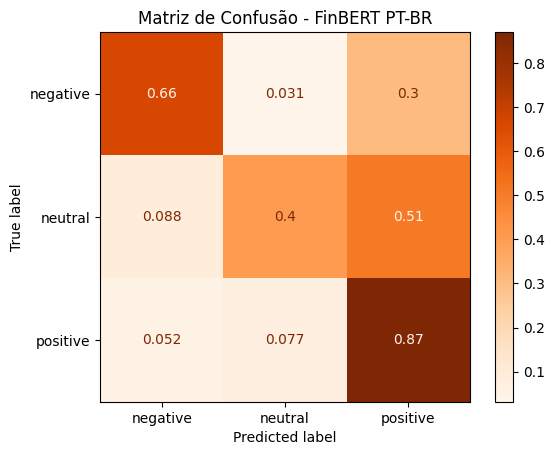

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(
    df['y'], 
    df['finbert_sentiment'].str.lower(),
    display_labels=['negative', 'neutral', 'positive'],
    cmap=plt.cm.Oranges,
    normalize='true')

disp.ax_.set_title('Matriz de Confusão - FinBERT PT-BR')
plt.show()

## Limpando frases para melhoria do modelo

In [3]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('portuguese'))

df = pd.read_csv('dados/financial_phrase_bank_finbert_ptbr_sentiment.csv')

df['text_pt_clean'] = df['text_pt'].str.lower()
df['text_pt_clean'] = df['text_pt_clean'].str.translate(str.maketrans('', '', string.punctuation))
df['text_pt_clean'] = df['text_pt_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,y,text,text_pt,finbert_sentiment,text_pt_clean
0,0,neutral,Technopolis plans to develop in stages an area...,A Technopolis planeja desenvolver em etapas um...,POSITIVE,technopolis planeja desenvolver etapas área in...
1,1,negative,The international electronic industry company ...,"A Elcoteq, empresa internacional da indústria ...",NEGATIVE,elcoteq empresa internacional indústria eletrô...
2,2,positive,With the new production plant the company woul...,Com a nova planta de produção a empresa aument...,POSITIVE,nova planta produção empresa aumentaria capaci...
3,3,positive,According to the company 's updated strategy f...,De acordo com a estratégia atualizada da empre...,POSITIVE,acordo estratégia atualizada empresa anos 2009...
4,4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,FINANCIAMENTO DO CRESCIMENTO DA ASPOCOMP A Asp...,POSITIVE,financiamento crescimento aspocomp aspocomp pe...


In [4]:
df['fb_new_sentiment'] = df['text_pt_clean'].apply(lambda x: pipe(x)[0]['label'])

print(classification_report(df['y'], df['fb_new_sentiment'].str.lower()))

              precision    recall  f1-score   support

    negative       0.48      0.84      0.61       604
     neutral       0.79      0.66      0.72      2878
    positive       0.53      0.53      0.53      1363

    accuracy                           0.65      4845
   macro avg       0.60      0.68      0.62      4845
weighted avg       0.68      0.65      0.65      4845



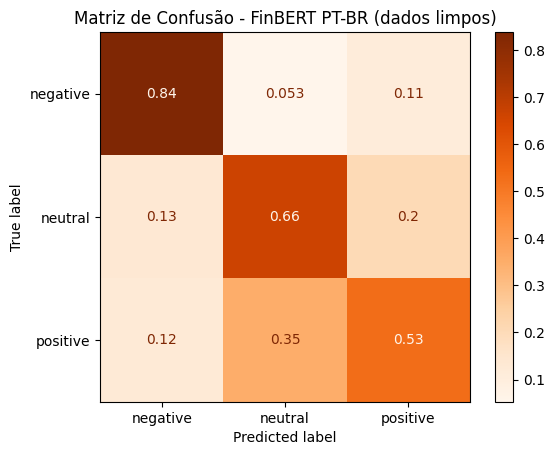

In [7]:
disp = ConfusionMatrixDisplay.from_predictions(
    df['y'], 
    df['fb_new_sentiment'].str.lower(),
    display_labels=['negative', 'neutral', 'positive'],
    cmap=plt.cm.Oranges,
    normalize='true')

disp.ax_.set_title('Matriz de Confusão - FinBERT PT-BR (dados limpos)')
plt.show()